In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [2]:
df_atvi = pd.read_csv("atvi_weekly_return_volatility.csv")
df_spy = pd.read_csv("spy_weekly_return_volatility.csv")

In [9]:
def train_test_svm_clf(df, clf, stocks, clf_name):
    train = df[df["Year"] == 2021]
    test = df[df["Year"] == 2022]
    ss = StandardScaler()
    X_train = train[["mean_return", "volatility"]]
    ss.fit(X_train)
    X_train_scaled = ss.transform(X_train)
    y_train = train["Label"].values.flatten()
    X_test = test[["mean_return", "volatility"]]
    X_test_scaled = ss.transform(X_test)
    y_test = test["Label"].values.flatten()
    
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    
    print(f"\nFor Classifier {clf_name} -> ")
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy on year 2 -> {round(100*accuracy, 2)} %")
    conf_matrix = confusion_matrix(y_test, y_pred)
    tn = conf_matrix[0][0]
    fp = conf_matrix[0][1]
    fn = conf_matrix[1][0]
    tp = conf_matrix[1][1]
    tpr = round((tp/(tp + fn))*100, 2)
    tnr = round((tn/(tn + fp))*100, 2)
    print(f"Recall -> {tpr} %")
    print(f"Speficitivity -> {tnr} %")
    ConfusionMatrixDisplay(conf_matrix, display_labels=["red", "green"]).plot()
    plt.show()

    i1, i2 = 100, 100
    bnh = []
    trade_gnb = []
    df_yr2_ret = np.array(X_test["mean_return"])
    for i in range(y_pred.shape[0]):
        i1 = i1*(1 + df_yr2_ret[i]/100)
        if y_pred[i] == "green":
            i2 = i2*(1 + df_yr2_ret[i]/100)
        bnh.append(i1)
        trade_gnb.append(i2)

    plt.figure(figsize=(15, 10))
    plt.plot(bnh)
    plt.xlabel("Weeks")
    plt.ylabel("Returns")
    plt.title(f"For {stocks} - Buy and Hold")
    plt.show()
    
    plt.figure(figsize=(15, 10))
    plt.plot(trade_gnb)
    plt.xlabel("Weeks")
    plt.ylabel("Returns")
    plt.title(f"For {stocks} - According to {clf_name} labels")
    plt.show()
    
    print(f"Final Amount for BnH -> $ {round(i1, 2)}")
    print(f"Final Amount for classifier -> $ {round(i2, 2)}")

In [10]:
#Classifiers
svm_clf_def = SVC(kernel="linear")
svm_clf_rbf = SVC(kernel="rbf")
svm_clf_quad = SVC(kernel="poly", degree=2)


For Classifier SVM (Linear) -> 
Accuracy on year 2 -> 38.46 %
Recall -> 12.9 %
Speficitivity -> 76.19 %


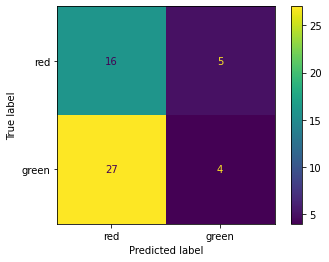

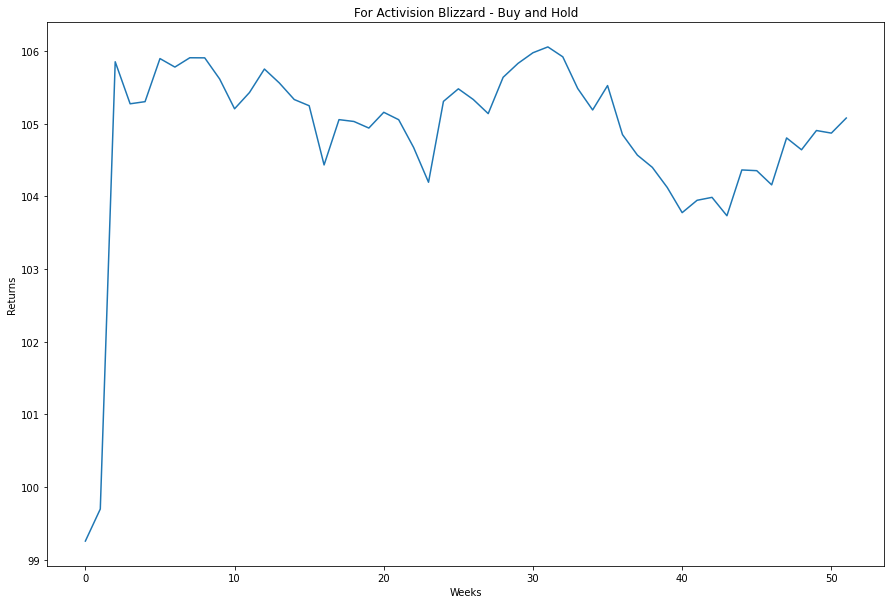

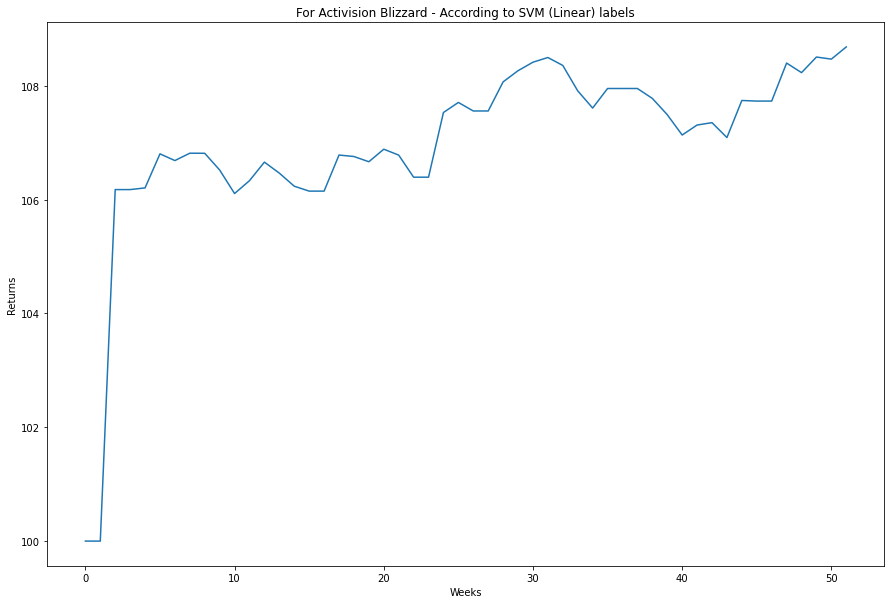

Final Amount for BnH -> $ 105.08
Final Amount for classifier -> $ 108.68

For Classifier SVM (Gaussian) -> 
Accuracy on year 2 -> 42.31 %
Recall -> 9.68 %
Speficitivity -> 90.48 %


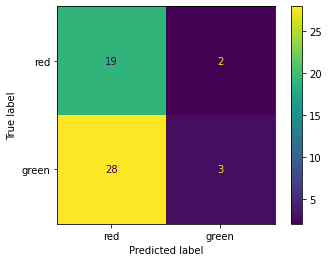

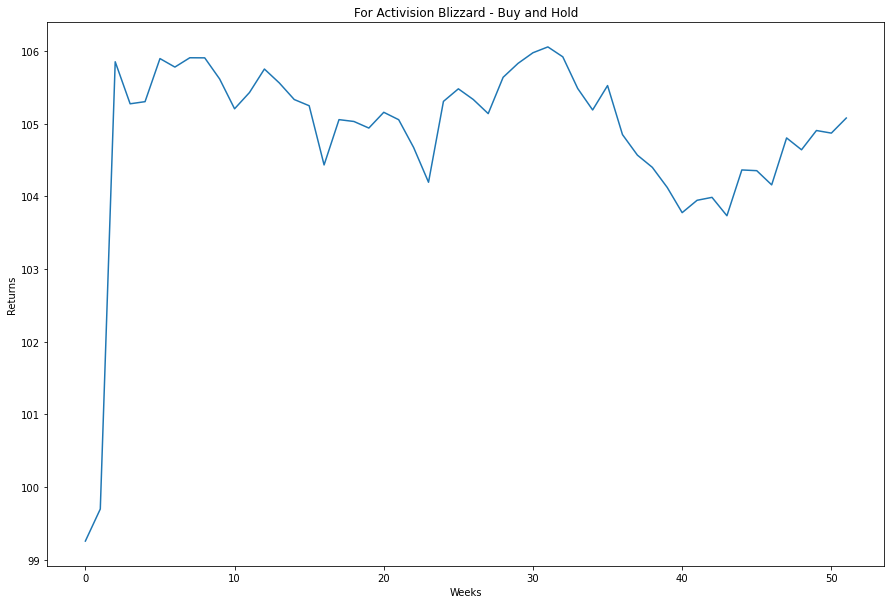

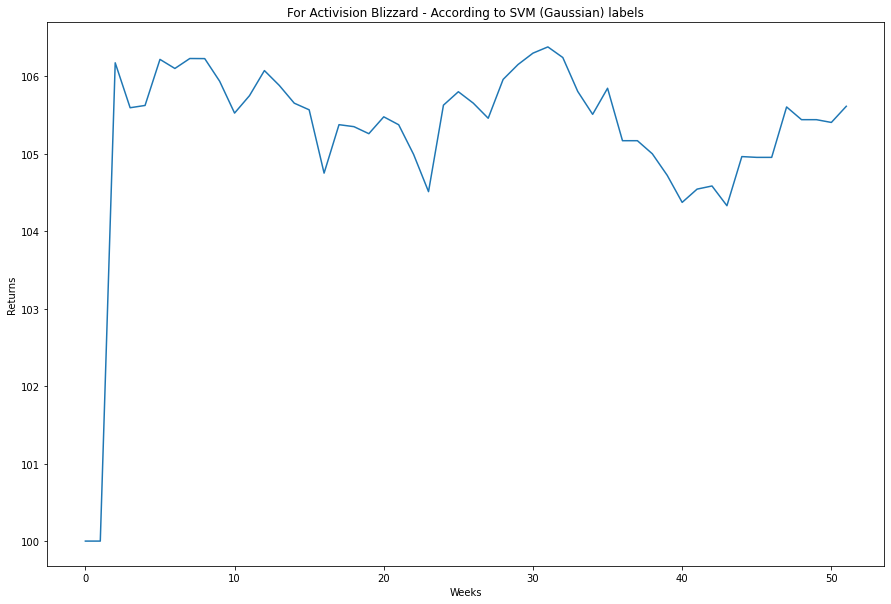

Final Amount for BnH -> $ 105.08
Final Amount for classifier -> $ 105.61

For Classifier SVM (Quadratic) -> 
Accuracy on year 2 -> 53.85 %
Recall -> 77.42 %
Speficitivity -> 19.05 %


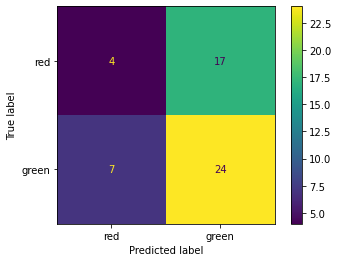

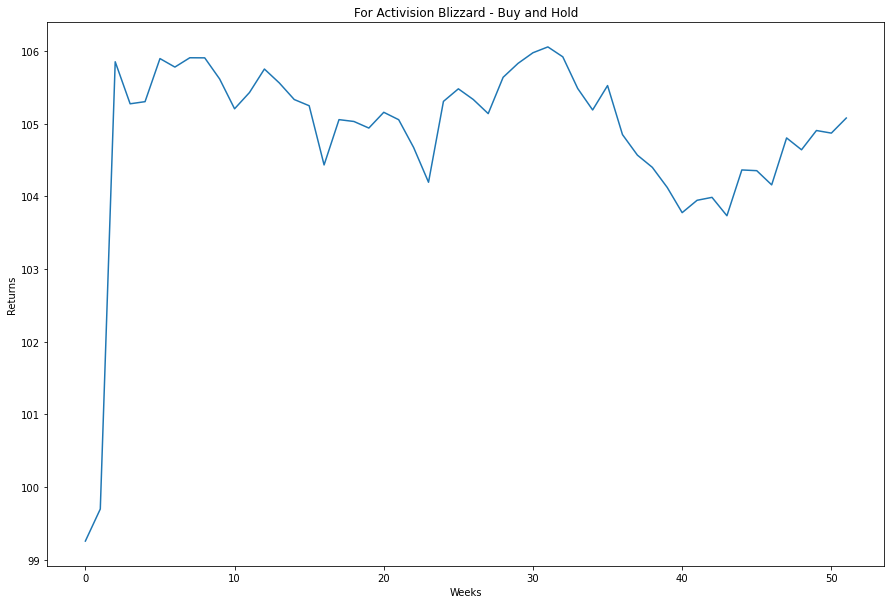

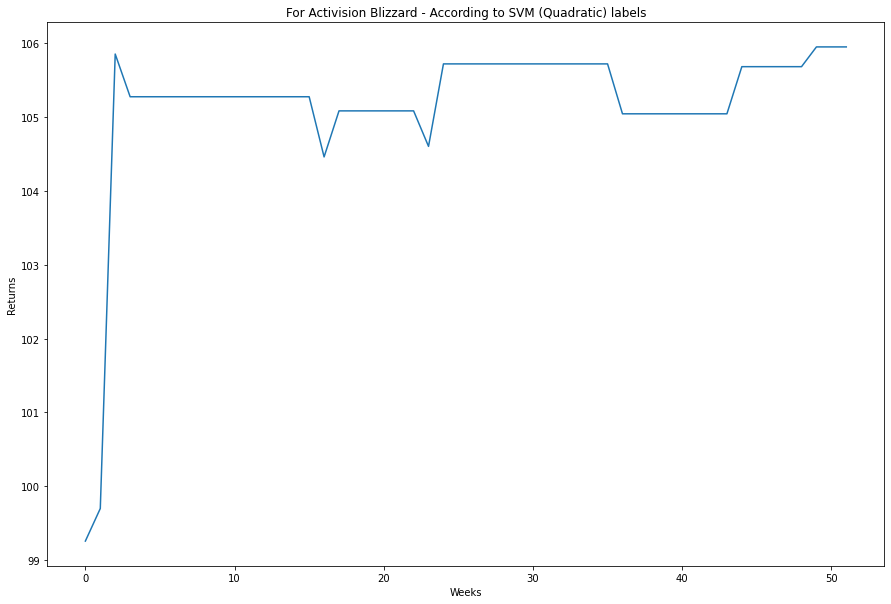

Final Amount for BnH -> $ 105.08
Final Amount for classifier -> $ 105.95


In [11]:
train_test_svm_clf(df_atvi, svm_clf_def, "Activision Blizzard", "SVM (Linear)")
train_test_svm_clf(df_atvi, svm_clf_rbf, "Activision Blizzard", "SVM (Gaussian)")
train_test_svm_clf(df_atvi, svm_clf_quad, "Activision Blizzard", "SVM (Quadratic)")


For Classifier SVM (Linear) -> 
Accuracy on year 2 -> 34.62 %
Recall -> 0.0 %
Speficitivity -> 100.0 %


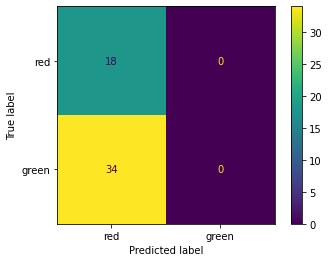

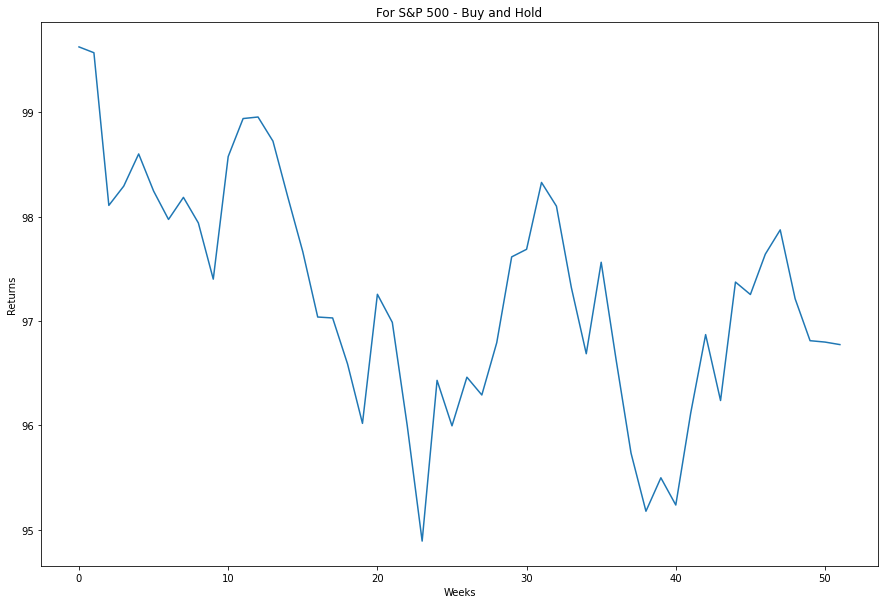

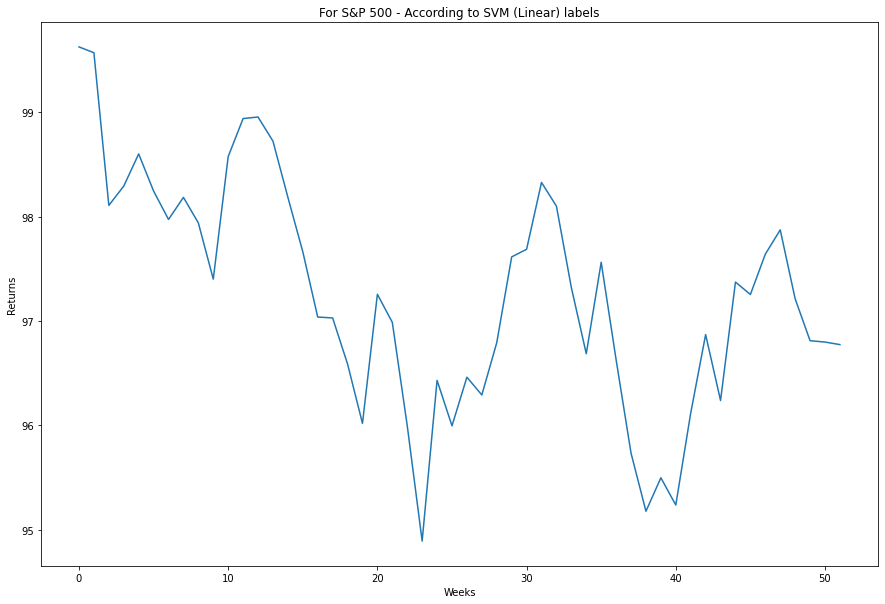

Final Amount for BnH -> $ 96.77
Final Amount for classifier -> $ 96.77

For Classifier SVM (Gaussian) -> 
Accuracy on year 2 -> 36.54 %
Recall -> 5.88 %
Speficitivity -> 94.44 %


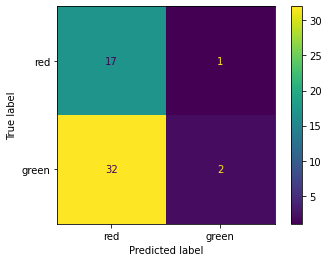

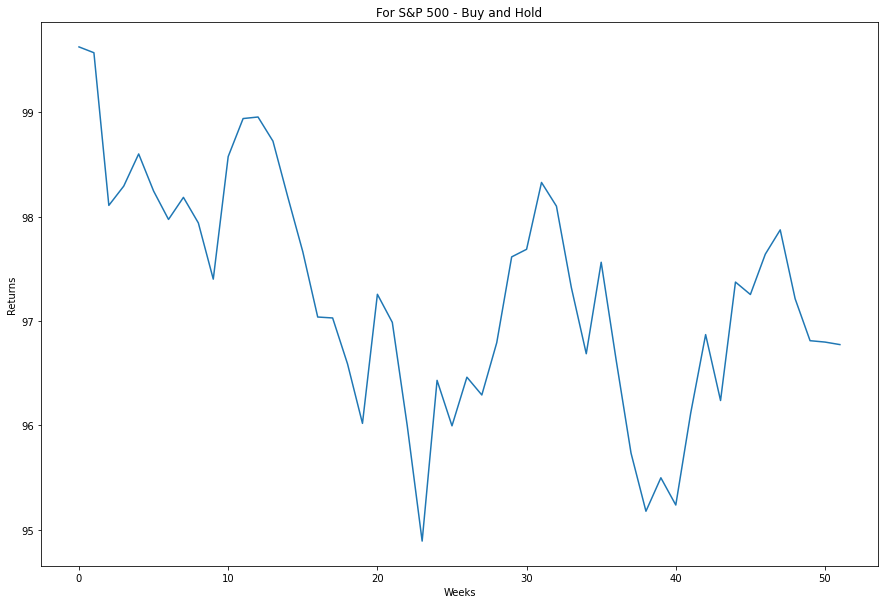

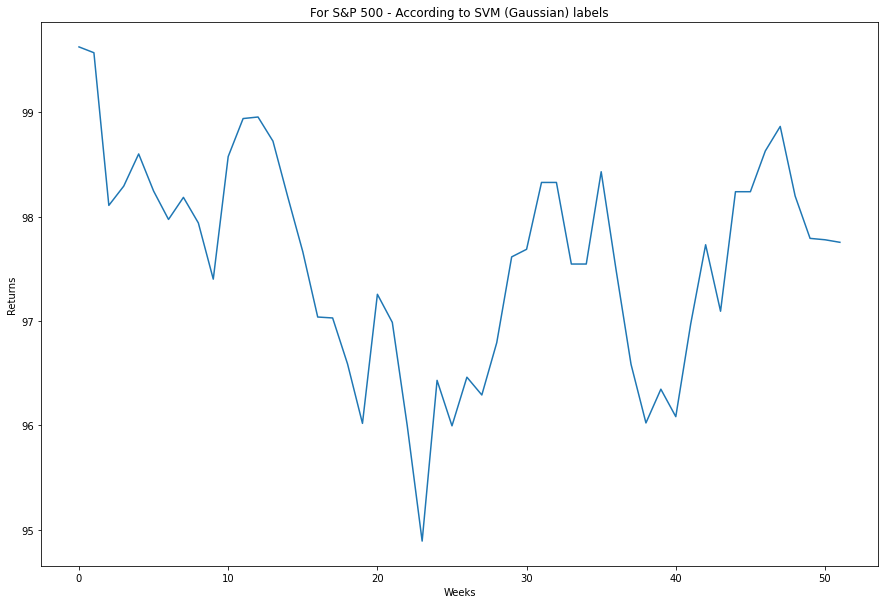

Final Amount for BnH -> $ 96.77
Final Amount for classifier -> $ 97.75

For Classifier SVM (Quadratic) -> 
Accuracy on year 2 -> 46.15 %
Recall -> 29.41 %
Speficitivity -> 77.78 %


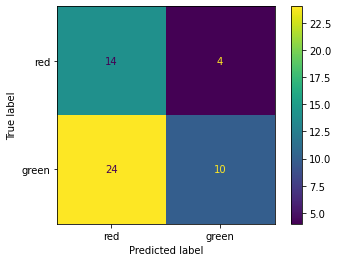

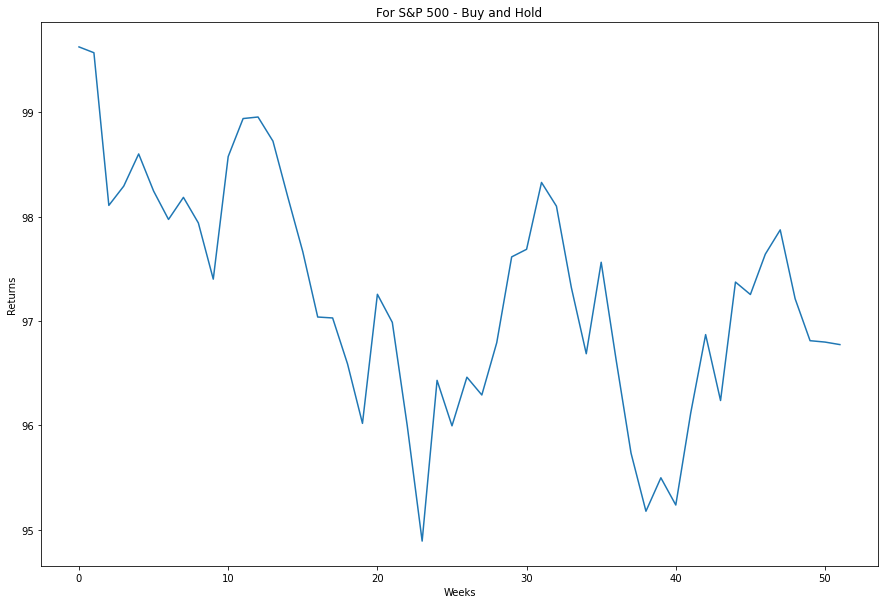

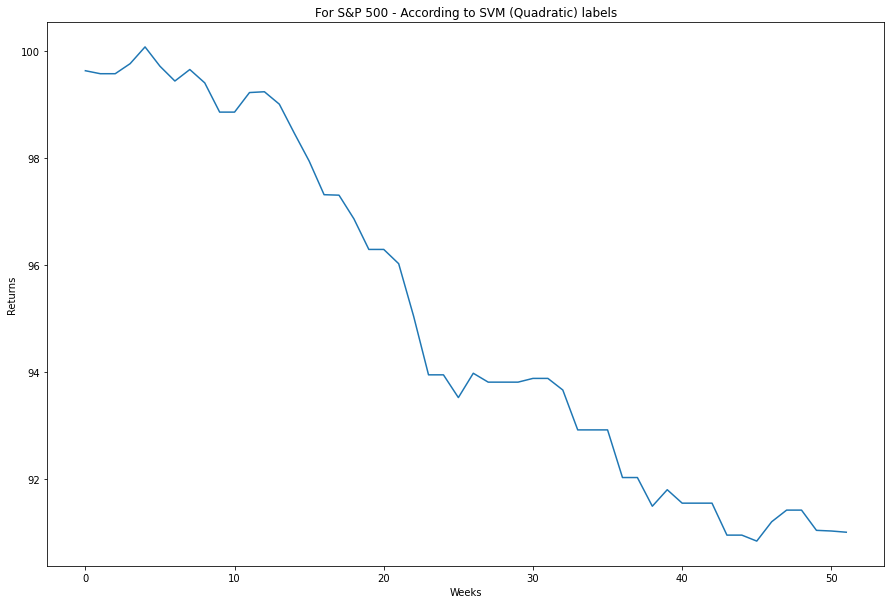

Final Amount for BnH -> $ 96.77
Final Amount for classifier -> $ 91.01


In [12]:
train_test_svm_clf(df_spy, svm_clf_def, "S&P 500", "SVM (Linear)")
train_test_svm_clf(df_spy, svm_clf_rbf, "S&P 500", "SVM (Gaussian)")
train_test_svm_clf(df_spy, svm_clf_quad, "S&P 500", "SVM (Quadratic)")